In [1]:
!pwd
import sys
%reload_ext autoreload
%autoreload 2
%matplotlib inline
sys.executable

/c/Users/81908/jupyter_notebook/tf_2_work/statistical_test_sample/coronavirus_trend


'C:\\Users\\81908\\Anaconda3\\envs\\tfgpu\\python.exe'

# 本当に若者の間でコロナの人数が急激に増えているのか検証した話
- https://qiita.com/tomone_hata/items/4ba59119dd6b03a14581?utm_source=Qiita%E3%83%8B%E3%83%A5%E3%83%BC%E3%82%B9&utm_campaign=3d901c706b-Qiita_newsletter_420_07_22_2020&utm_medium=email&utm_term=0_e44feaa081-3d901c706b-34468725

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
# csvダウンロードサイト
# https://catalog.data.metro.tokyo.lg.jp/dataset/t000010d0000000068/resource/c2d997db-1450-43fa-8037-ebb11ec28d4c
df = pd.read_csv("130001_tokyo_covid19_patients.csv", parse_dates=["公表_年月日"], index_col='公表_年月日')
df.info()
print(df.describe())
display(df.head())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10420 entries, 2020-01-24 to 2020-07-23
Data columns (total 15 columns):
No              10420 non-null int64
全国地方公共団体コード     10420 non-null int64
都道府県名           10420 non-null object
市区町村名           0 non-null float64
曜日              10420 non-null object
発症_年月日          0 non-null float64
患者_居住地          10053 non-null object
患者_年代           10420 non-null object
患者_性別           10420 non-null object
患者_属性           0 non-null float64
患者_状態           0 non-null float64
患者_症状           0 non-null float64
患者_渡航歴の有無フラグ    0 non-null float64
備考              0 non-null float64
退院済フラグ          7186 non-null float64
dtypes: float64(8), int64(2), object(5)
memory usage: 1.3+ MB
                  No  全国地方公共団体コード  市区町村名  発症_年月日  患者_属性  患者_状態  患者_症状  \
count   10420.000000      10420.0    0.0     0.0    0.0    0.0    0.0   
mean     6713.207102     130001.0    NaN     NaN    NaN    NaN    NaN   
std     12348.217821          0.0    NaN     N

,No,全国地方公共団体コード,都道府県名,市区町村名,曜日,発症_年月日,患者_居住地,患者_年代,患者_性別,患者_属性,患者_状態,患者_症状,患者_渡航歴の有無フラグ,備考,退院済フラグ
公表_年月日,,,,,,,,,,,,,,,
2020-01-24,1,130001,東京都,NaN,金,NaN,湖北省武漢市,40代,男性,NaN,NaN,NaN,NaN,NaN,1.0
2020-01-25,2,130001,東京都,NaN,土,NaN,湖北省武漢市,30代,女性,NaN,NaN,NaN,NaN,NaN,1.0
2020-01-30,3,130001,東京都,NaN,木,NaN,湖南省長沙市,30代,女性,NaN,NaN,NaN,NaN,NaN,1.0
2020-02-13,4,130001,東京都,NaN,木,NaN,都内,70代,男性,NaN,NaN,NaN,NaN,NaN,1.0
2020-02-14,5,130001,東京都,NaN,金,NaN,都内,50代,女性,NaN,NaN,NaN,NaN,NaN,1.0


Generation,-,10,20,30,40,50,60,70,80,90,over 100,under 10,unknown
Date,,,,,,,,,,,,,
2020-01-24,0,0,0,0,1,0,0,0,0,0,0,0,0
2020-01-25,0,0,0,1,0,0,0,0,0,0,0,0,0
2020-01-30,0,0,0,1,0,0,0,0,0,0,0,0,0
2020-02-13,0,0,0,0,0,0,0,1,0,0,0,0,0
2020-02-14,0,0,0,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-19,0,3,84,45,26,13,7,6,1,0,0,3,0
2020-07-20,0,2,69,39,27,13,8,5,3,1,0,1,0
2020-07-21,0,4,83,54,37,30,11,10,8,0,0,0,0


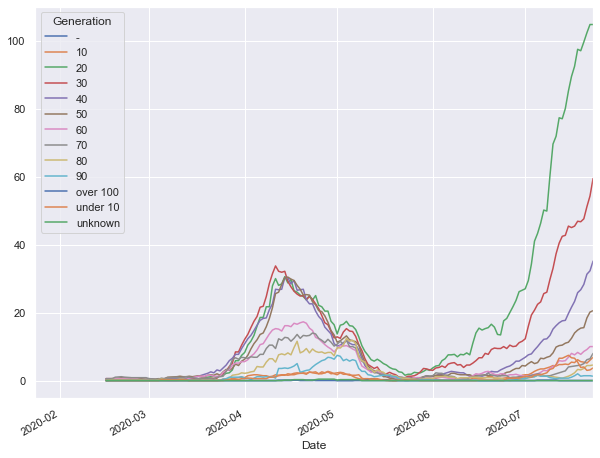

In [4]:
# 公表_年月日、患者_年代でクロス集計
df_cross = pd.crosstab(df.index, df['患者_年代'])

# 日本語表記除去
df_cross = df_cross.rename(columns={'10歳未満':'under 10',\
         '10代': '10', \
         '20代': '20', \
         '30代': '30', \
         '40代': '40', \
         '50代': '50', \
         '60代': '60', \
         '70代': '70', \
         '80代': '80', \
         '90代': '90', \
         '100歳以上': 'over 100', \
         "'-": '-',\
         '不明': 'unknown'\
        })
df_cross.index.names = ['Date']
df_cross.columns.name = 'Generation'
sort_cols = sorted(df_cross.columns.to_list())
df_cross = df_cross[sort_cols]
display(df_cross)

# 7日で移動平均を取って、グラフ表示（可視化）
df_cross.rolling(7).mean().plot(figsize=(10, 8))

患者_居住地,―,湖北省武漢市,湖南省長沙市,調査中,都内,都外
Date,,,,,,
2020-01-24,0,1,0,0,0,0
2020-01-25,0,1,0,0,0,0
2020-01-30,0,0,1,0,0,0
2020-02-13,0,0,0,0,1,0
2020-02-14,0,0,0,0,2,0
...,...,...,...,...,...,...
2020-07-18,0,0,0,0,280,10
2020-07-19,0,0,0,0,178,10
2020-07-20,0,0,0,0,152,16


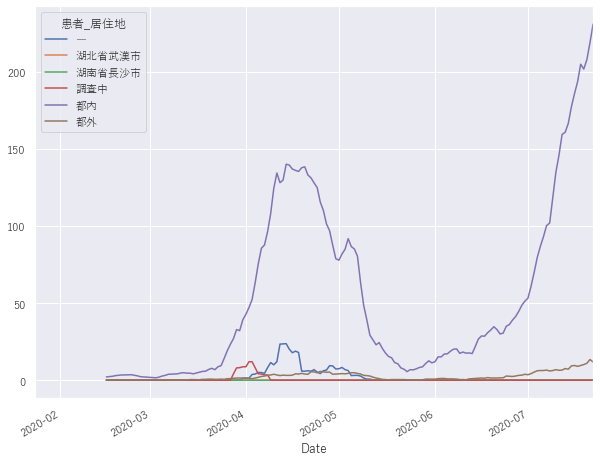

In [5]:
# 公表_年月日、患者_居住地でクロス集計
df_cross = pd.crosstab(df.index, df['患者_居住地'])
df_cross.index.names = ['Date']
display(df_cross)

# 7日で移動平均を取って、グラフ表示（可視化）
plt.rcParams["font.family"] = 'Yu Gothic'   # Yu Gothic指定すれば日本語出せる
df_cross.rolling(7).mean().plot(figsize=(10, 8))

曜日,土,日,月,木,水,火,金
Date,,,,,,,
2020-01-24,0,0,0,0,0,0,1
2020-01-25,1,0,0,0,0,0,0
2020-01-30,0,0,0,1,0,0,0
2020-02-13,0,0,0,1,0,0,0
2020-02-14,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...
2020-07-19,0,188,0,0,0,0,0
2020-07-20,0,0,168,0,0,0,0
2020-07-21,0,0,0,0,0,237,0


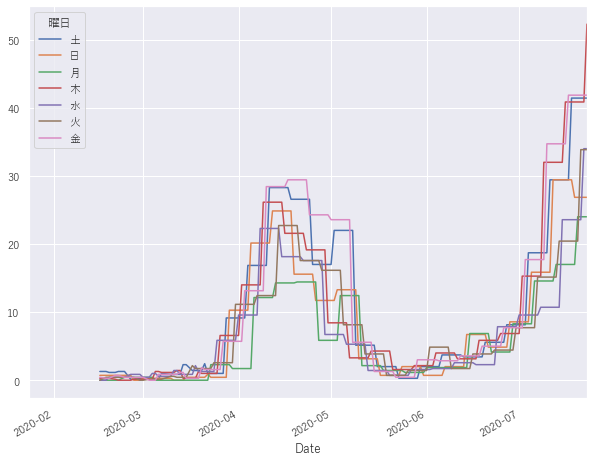

In [6]:
# 公表_年月日、曜日でクロス集計
df_cross = pd.crosstab(df.index, df['曜日'])
df_cross.index.names = ['Date']
sort_cols = sorted(df_cross.columns.to_list())
df_cross = df_cross[sort_cols]
display(df_cross)

# 7日で移動平均を取って、グラフ表示（可視化）
plt.rcParams["font.family"] = 'Yu Gothic'   # Yu Gothic指定すれば日本語出せる
df_cross.rolling(7).mean().plot(figsize=(10, 8))

患者_性別,'-,不明,女,女性,男性,調査中
Date,,,,,,
2020-01-24,0,0,0,0,1,0
2020-01-25,0,0,0,1,0,0
2020-01-30,0,0,0,1,0,0
2020-02-13,0,0,0,0,1,0
2020-02-14,0,0,0,1,1,0
...,...,...,...,...,...,...
2020-07-19,0,0,0,66,122,0
2020-07-20,0,0,0,72,96,0
2020-07-21,0,0,0,102,135,0


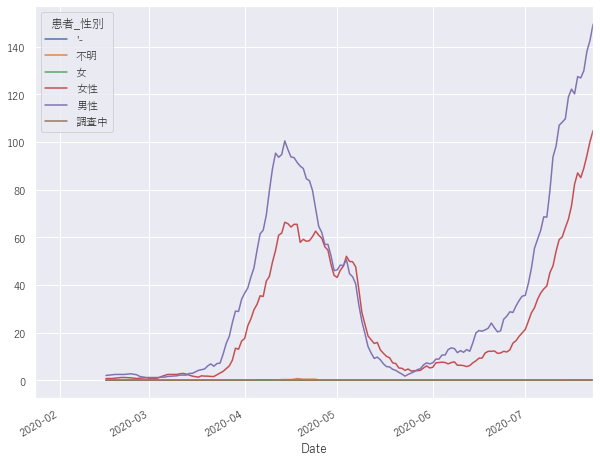

In [7]:
# 公表_年月日、患者_性別でクロス集計
df_cross = pd.crosstab(df.index, df['患者_性別'])
df_cross.index.names = ['Date']
sort_cols = sorted(df_cross.columns.to_list())
df_cross = df_cross[sort_cols]
display(df_cross)

# 7日で移動平均を取って、グラフ表示（可視化）
plt.rcParams["font.family"] = 'Yu Gothic'   # Yu Gothic指定すれば日本語出せる
df_cross.rolling(7).mean().plot(figsize=(10, 8))

In [8]:
for c in df.columns:
    print(df[c].value_counts())

2047    1
9526    1
1362    1
7505    1
5456    1
       ..
4767    1
6814    1
669     1
2716    1
2049    1
Name: No, Length: 10420, dtype: int64
130001    10420
Name: 全国地方公共団体コード, dtype: int64
東京都    10420
Name: 都道府県名, dtype: int64
Series([], Name: 市区町村名, dtype: int64)
木    1892
金    1763
土    1712
日    1390
火    1340
水    1295
月    1028
Name: 曜日, dtype: int64
Series([], Name: 発症_年月日, dtype: int64)
都内        9197
都外         431
―          337
調査中         85
湖北省武漢市       2
湖南省長沙市       1
Name: 患者_居住地, dtype: int64
20代       3235
30代       2151
40代       1432
50代       1169
60代        740
70代        647
80代        426
10代        226
90代        204
10歳未満      177
不明           7
100歳以上       5
'-           1
Name: 患者_年代, dtype: int64
男性     6186
女性     4225
不明        6
女         1
調査中       1
'-        1
Name: 患者_性別, dtype: int64
Series([], Name: 患者_属性, dtype: int64)
Series([], Name: 患者_状態, dtype: int64)
Series([], Name: 患者_症状, dtype: int64)
Series([], Name: 患者_渡航歴の有無フラグ, dtype: int64)
